#Analises de Vendas de Bar/Restaurante


In [52]:
#Importações de Bibliotecas

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
#carregamento de dados e limpeza

##Origem real dos dados utilzados:
from google.colab import drive
drive.mount('/content/drive')
sales_data = pd.read_csv('/content/drive/My Drive/Mate_Academy_colab_arquivos/sales_data_updated.csv')

##Arquivo lido direto do Github:
##sales_data = pd.read_csv('sales_data_updated.csv')

sales_data.head()
sales_data.info()
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shippin

#Analise exploratória

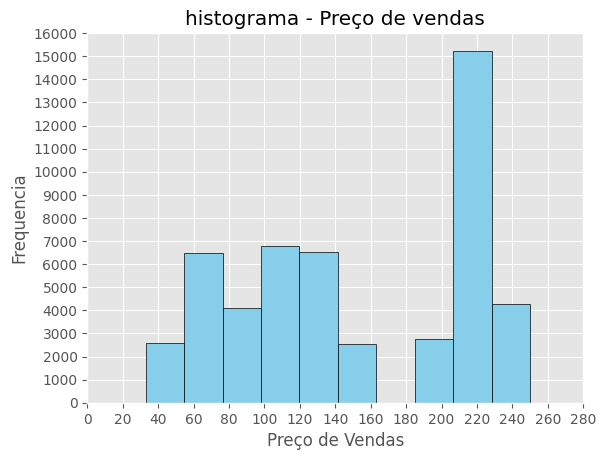

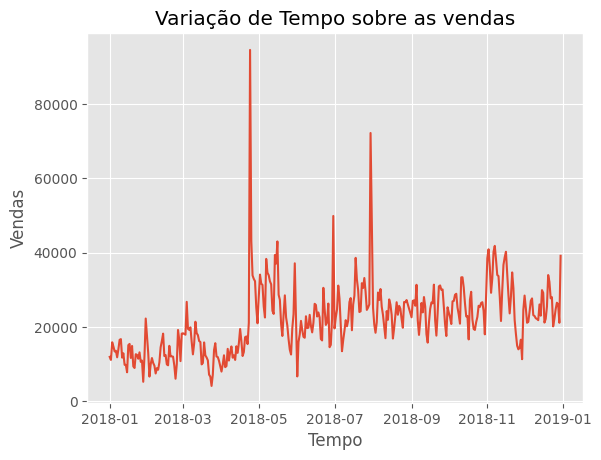

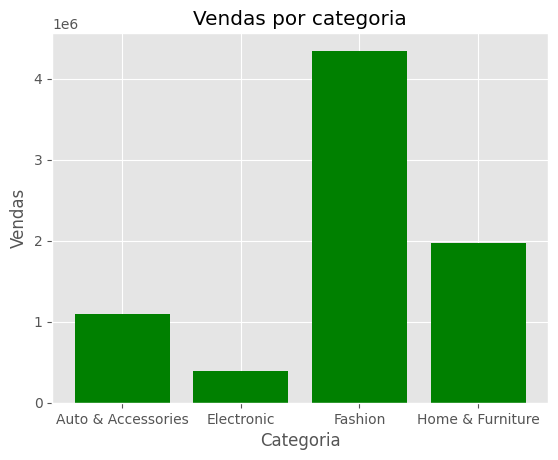

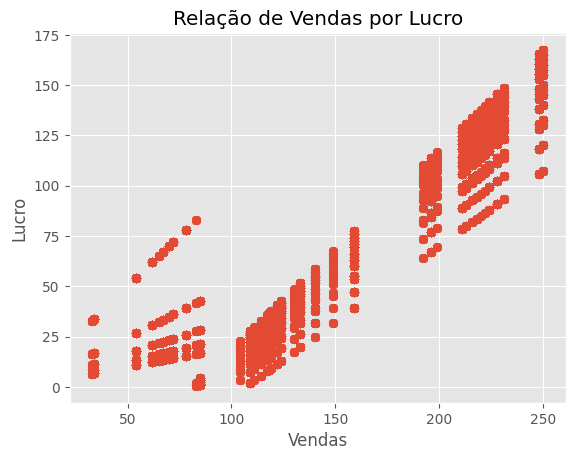

In [54]:
# Gráficos para Analises

## Gráficos de forma individualizadas

### Histograma - Preço de Vendas

plt.hist(sales_data['sales'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Preço de Vendas')
plt.ylabel('Frequencia')
xticks = np.arange(0, sales_data['sales'].max() + 50, 20)
plt.xticks(xticks)
yticks = np.arange(0, plt.gca().get_ylim()[1] + 1000, 1000)
plt.yticks(yticks)
plt.title('histograma - Preço de vendas')
plt.show()

## Grafico de Linhas - Variação de venda pelo tempo

vendas_por_data = sales_data.groupby('order_date')['sales'].sum().reset_index()

plt.plot(vendas_por_data['order_date'], vendas_por_data['sales'])
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.title("Variação de Tempo sobre as vendas")
plt.show()

## Gráfico em barras - Vendas por categoria

vendas_por_categoria = sales_data.groupby('product_category')['sales'].sum().reset_index()

plt.bar(vendas_por_categoria['product_category'], vendas_por_categoria['sales'], color = 'green')
plt.xlabel("Categoria")
plt.ylabel("Vendas")
plt.title("Vendas por categoria")
plt.show()

## Gráfico de Dispersão - Relação de Vendas por Lucro

plt.scatter(sales_data['sales'], sales_data['profit'])
plt.xlabel("Vendas")
plt.ylabel("Lucro")
plt.title("Relação de Vendas por Lucro")
plt.show()



#Dashboar de Graficos

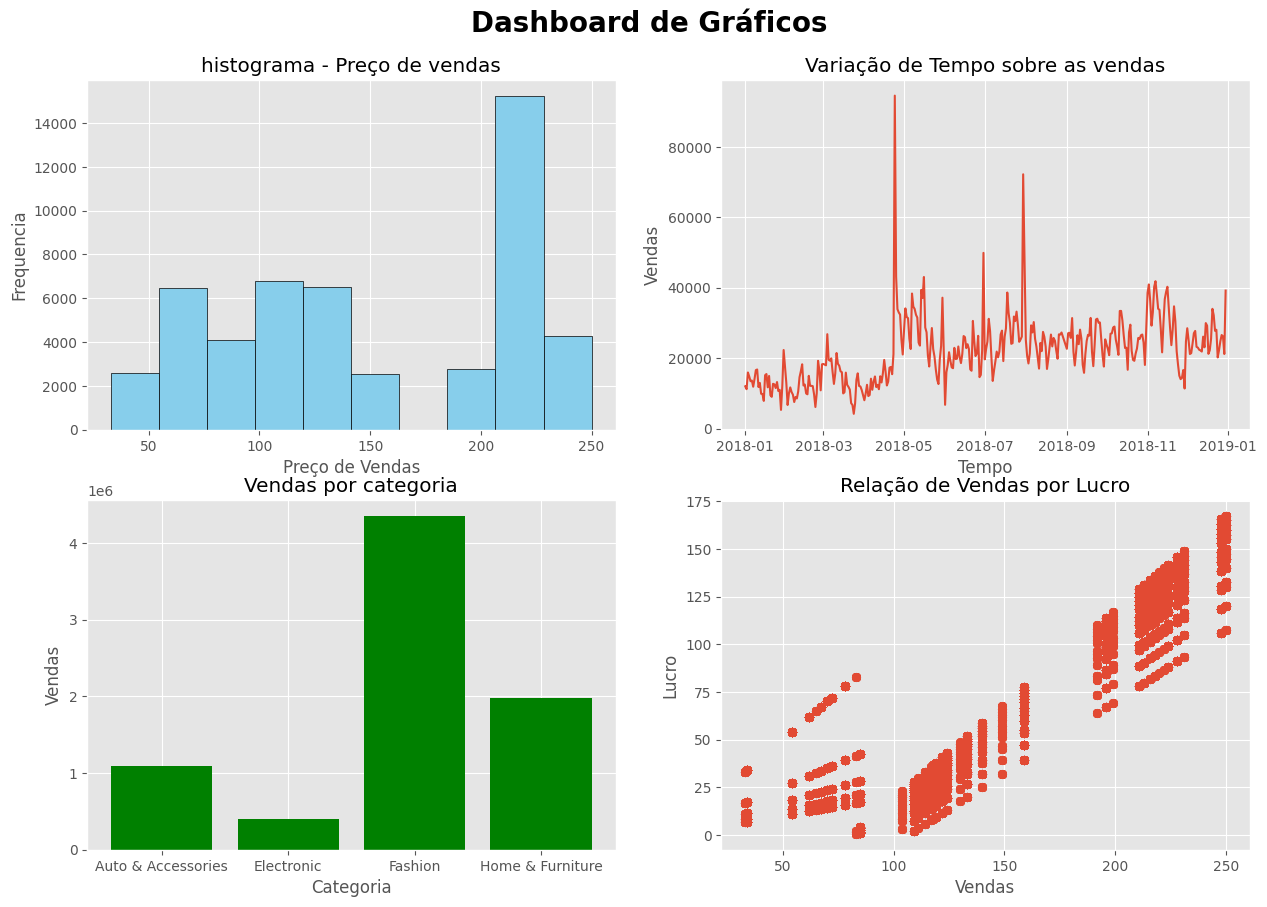

In [55]:
## Dashboard de graficos

plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))


ax[0, 0].hist(sales_data['sales'], bins=10, color='skyblue', edgecolor='black')
ax[0, 0].set_xlabel('Preço de Vendas')
ax[0, 0].set_ylabel('Frequencia')
ax[0, 0].set_title('histograma - Preço de vendas')


vendas_por_data = sales_data.groupby('order_date')['sales'].sum().reset_index()

ax[0, 1].plot(vendas_por_data['order_date'], vendas_por_data['sales'])
ax[0, 1].set_xlabel("Tempo")
ax[0, 1].set_ylabel("Vendas")
ax[0, 1].set_title("Variação de Tempo sobre as vendas")


vendas_por_categoria = sales_data.groupby('product_category')['sales'].sum().reset_index()

ax[1, 0].bar(vendas_por_categoria['product_category'], vendas_por_categoria['sales'], color = 'green')
ax[1, 0].set_xlabel("Categoria")
ax[1, 0].set_ylabel("Vendas")
ax[1, 0].set_title("Vendas por categoria")


ax[1, 1].scatter(sales_data['sales'], sales_data['profit'])
ax[1, 1].set_xlabel("Vendas")
ax[1, 1].set_ylabel("Lucro")
ax[1, 1].set_title("Relação de Vendas por Lucro")

fig.suptitle('Dashboard de Gráficos', fontsize=20, fontweight='bold', y=0.95)


plt.show()

#Conclusão:

1º - Analisando o histograma, temos que a Faixa de Venda mais comum está entre aproximadamente 210 e 230, tendo está um grande destaque quando comparada com as demais faixas.

2º - observando o grafico de linha, podemos perceber que há uma tendencia de crescimento quando avaliamos o inicio e o fim do grafico, porém, fica evidente que existe uma sazonalidade em relação as vendas.

3º - O grafico de barras deixa evidente que a categoria mais popular é a "Fashion", e a que tem menor popularidade é a categoria "Electronic"

4º - No grafico de dispersão trás a existência de uma relação na maior quantidade de pedidos, em que, quanto maior a quantidade de vendas maior o lucro.